# First Test

In [ ]:
pip install shap

In [11]:
# import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import shap                
shap.initjs()

In [10]:
# read the data
df = pd.read_csv('Advertising.csv',dtype={'sales': np.float64})

In [7]:
# Create train test  split.
Y = df['sales']
X =  df[['TV', 'radio', 'newspaper']]

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [12]:
# Fit Random Forest Regressor Model
rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=20)
rf.fit(X_train, Y_train) 

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=0)

In [14]:
# Predict
Y_predict=rf.predict(X_test)

In [15]:
# RMSE
print('RMSE: ',mean_squared_error(Y_test, Y_predict)**(0.5))

RMSE:  1.1288182188606912


In [16]:
# create explainer model by passing trained model to shap
explainer = shap.TreeExplainer(rf)

In [17]:
# Get SHAP values for the training data from explainer model
shap_values_train = explainer.shap_values(X_train)


# Get SHAP values for the test data from explainer model
shap_values_test = explainer.shap_values(X_test)

In [18]:
# Create a dataframe of the shap values for the training set and the test set
df_shap_train=pd.DataFrame(shap_values_train,columns=['TV_Shap','radio_Shap','newspaper_Shap'])
df_shap_test=pd.DataFrame(shap_values_test,columns=['TV_Shap','radio_Shap','newspaper_Shap'])

In [19]:
# Base Value: Training data 
print('base array: ','\n',shap_values_train.base[0], '\n')
print('basevalue: ',shap_values_train.base[0][3])

# Base Value: Test data 
#print('base array: ','\n',shap_values_test.base[0], '\n')
#print('basevalue: ',shap_values_test.base[0][3])

base array:  
 [[-5.59654913]
 [ 1.554187  ]
 [ 0.26030251]
 [14.2931875 ]] 

basevalue:  [14.2931875]


In [26]:
# Base Value is is calculated from the training dataset so it's same for test data
base_value=shap_values_train.base[0][3][0]

In [27]:
# Create a new column for base value
df_shap_train['(ShapValues + BaseValue)']=df_shap_train.iloc[:,0]+df_shap_train.iloc[:,1]+df_shap_train.iloc[:,2]+base_value

In [23]:
# Also create a new columns for the prediction values from training dataset
df_shap_train['prediction']=pd.DataFrame(list(rf.predict(X_train)))


# Note: Prediction Column is added to compare the values of Predicted with the sum of Base and SHAP Values

In [24]:
df_shap_train.head()

,TV_Shap,radio_Shap,newspaper_Shap,(ShapValues + BaseValue),prediction
0,-5.596549,1.554187,0.260303,10.511128,10.511128
1,-4.420114,-0.069793,-0.022996,9.780284,9.780284
2,0.756101,0.994068,-0.040818,16.002539,16.002539
3,2.824184,-1.733645,-0.024862,15.358865,15.358865
4,3.169459,-0.752598,0.130336,16.840384,16.840384


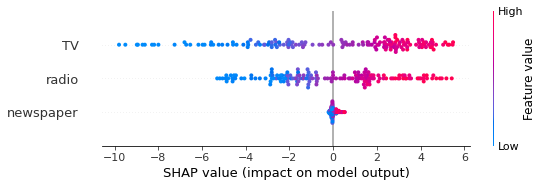

In [28]:
#SHAP Summary plot for training data
shap.summary_plot(shap_values_train,X_train)

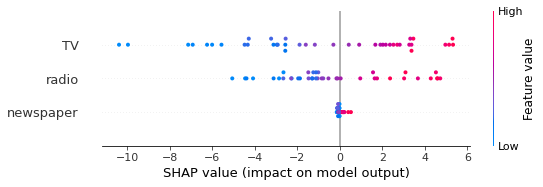

In [29]:
#SHAP Summary plot for test data
shap.summary_plot(shap_values_test,X_test)

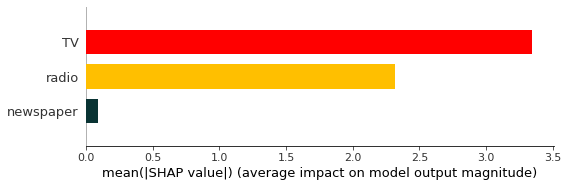

In [30]:
#Plot to see the average impat on the model output by each feature.
shap.summary_plot(shap_values_train,X_train,plot_type='bar',color=['#093333','#ffbf00','#ff0000'])

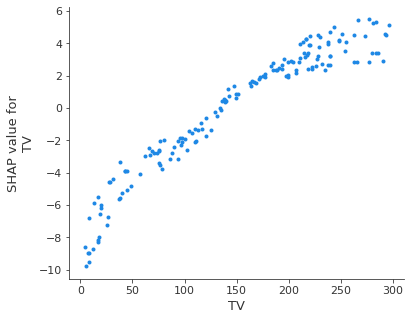

In [31]:
# Market Response for TV : Plot between TV ads spend and SHAP Values
shap.dependence_plot("TV",shap_values_train,X_train,interaction_index=None)

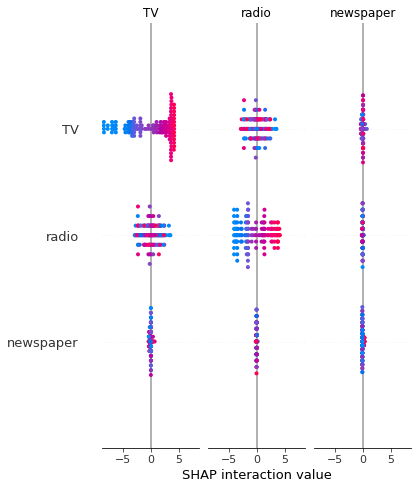

In [36]:
# Interaction Summary: Get the interaction values
shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(X_train)

# Plot Interaction Summary
shap.summary_plot(shap_interaction_values, X_train)